# Paardenvechters Draft

In [1]:
# Import packages
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go

link to dataset3: https://www.kaggle.com/datasets/henryshan/sleep-health-and-lifestyle
## Introductie

Diabetes is een chronische ziekte die impact heeft op miljoenen mensen. Hierbij kan het lichaam glucose niet goed reguleren wat kan leiden tot een te hoge bloedsuikerspiegel en schade aan verschillende organen als het niet wordt behandeld.

Diabetes kan in twee vormen voorkomen: diabetes type 1 en type 2 In deze data story wordt er voornamelijk gesproken over type 2, omdat er verschillende correlaties gevonden kunnen worden tussen verschillende factoren zoald voeding, sporten en klimaat die van invloed zijn bij het ontstaan van deze ziekte integenstelling tot diabetes type 1 dat alleen kan onstaan op basis van je genetische aanleg. Door te begrijpen hoe fysieke activiteit en omgevingsfactoren bijdragen aan deze aandoening, kunnen we effectievere preventie- en behandelstrategieën ontwikkelen en de levenskwaliteit van mensen die diabetes hebben verbeteren.

studenten: Pepe Morselt (15239551), Marilène Oud (15247112), Paul Elsinghorst (15002608), Thimo de Wolff (15240428)

Onze perspectieven en argumenten zijn de volgende:

Verschillende levensstijl factoren kunnen een impact hebben op het risico en het ontstaan van diabetes.

Arg 1: Regelmatige lichaamsbeweging, zoals aerobe oefeningen en krachttraining, verbetert niet alleen de insulinegevoeligheid maar speelt ook een cruciale rol in gewichtsbeheersing. Een gebalanceerd dieet is daarnaast ook essentieel voor gewichtsbeheersing en diabetespreventie

Arg 2: Naast roken hebben andere levensstijlkeuzes zoals stressmanagement en slaappatronen ook invloed op het risico op diabetes. Overmatige consumptie van alcohol kan ook leiden tot insulineresistentie.

Zwangerschap kan ook een belangrijke invloed hebben op de ontwikkeling van diabetes.

Arg 1: Zwangerschapsdiabetes ontstaat wanneer de hormonen van de zwangerschap de insulinewerking van het lichaam verstoren, wat leidt tot een verhoogde bloedsuikerspiegel. Dit type diabetes verdwijnt meestal na de bevalling, maar het kan zowel voor de moeder als het kind complicaties veroorzaken, zoals een verhoogd risico op type 2 diabetes later in het leven.

Door een gezond dieet met veel suikervrije voedingsmiddelen kan diabetes type 2 genezen worden.

Arg 1: Een gezond dieet dat rijk is aan vezels, volle granen, magere eiwitten en groenten kan bijdragen aan gewichtsverlies of gewichtsbeheersing.

Arg 2: Suikervrije voedingsmiddelen, vooral diegene met een lage glycemische index (GI), kunnen helpen om stabiele bloedsuikerspiegels te handhaven.

In [37]:
#https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
#https://www.kaggle.com/datasets/mathchi/diabetes-data-set
df = pd.read_csv("diabetes.csv")
pd.set_option('display.max_columns', None)
df = df.rename(columns={'Outcome': 'diabetes'})
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  diabetes  
0                     0.627   50         1  
1                     0.351   31         0  
2                     0.672   32         1  
3                     0.167   21         0  
4                     2.288   33         1

In [38]:
#https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
df2 = pd.read_csv("diabetes_prediction_dataset.csv")
pd.set_option('display.max_columns', None)
df2.head(5)

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

In [39]:
df3 = pd.read_csv("ss.csv")
df3['BMI Category'] = df3['BMI Category'].replace('Normal Weight', 'Normal')
df3.head(5)

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75        10000            NaN  
2         125/80          75        10000            NaN  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea

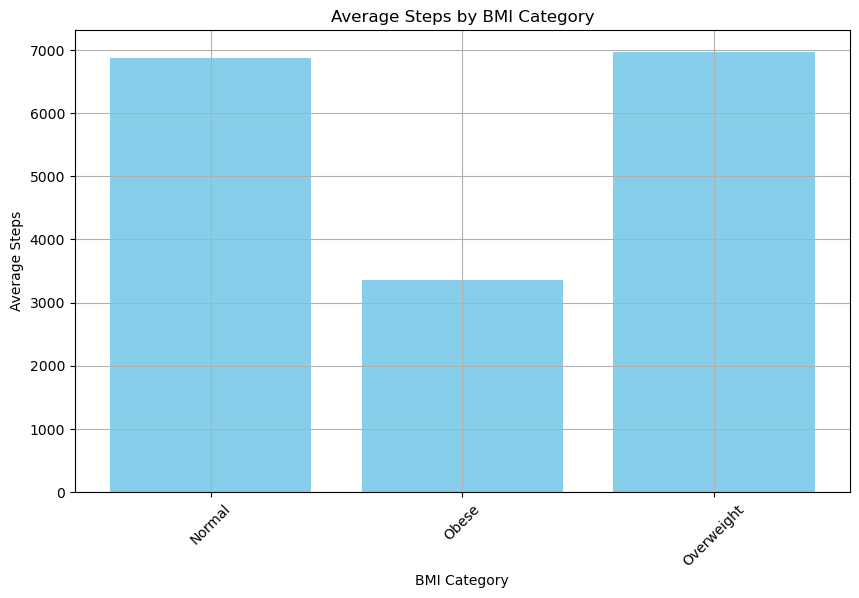

In [5]:
steps_by_bmi = df3.groupby('BMI Category')['Daily Steps'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(steps_by_bmi['BMI Category'], steps_by_bmi['Daily Steps'], color='skyblue')
plt.xlabel('BMI Category')
plt.ylabel('Average Steps')
plt.title('Average Steps by BMI Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

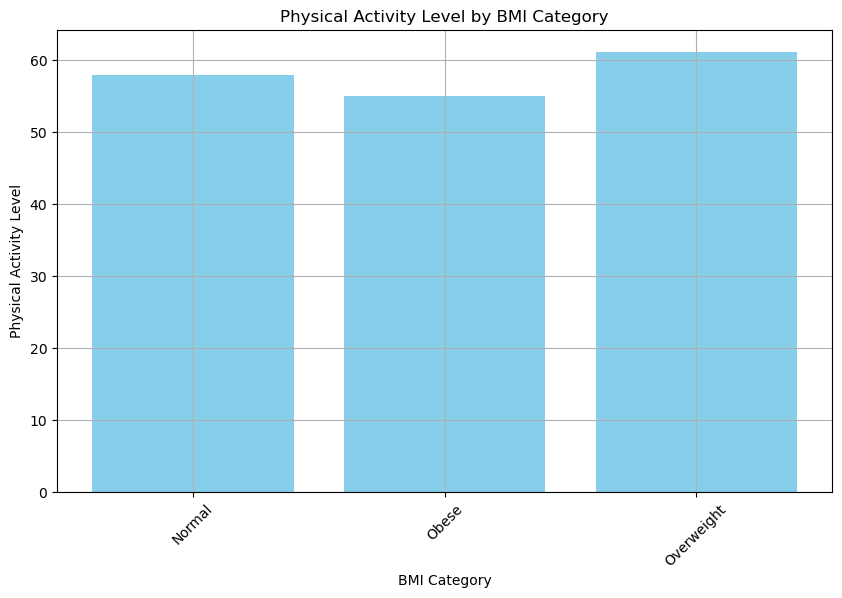

In [6]:
steps_by_bmi = df3.groupby('BMI Category')['Physical Activity Level'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(steps_by_bmi['BMI Category'], steps_by_bmi['Physical Activity Level'], color='skyblue')
plt.xlabel('BMI Category')
plt.ylabel('Physical Activity Level')
plt.title('Physical Activity Level by BMI Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [7]:
def convert_bp_to_average(bp):
    systolic, diastolic = map(int, bp.split('/'))
    return (systolic + diastolic) / 2

# Apply the function to the 'Blood Pressure' column
df3['Average Blood Pressure'] = df3['Blood Pressure'].apply(convert_bp_to_average)
df3

Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
368        369  Female   59                 Nurse             8.1   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                   6                       60             8       Normal   
2                   6                       60             8       Normal   
3                   4                       30             8        Obese   
4                   4                       30             8        Obese   
..                ...                      ...           ...          ...   
368                 9                       75             3   Overweight   
369                 9                       75             3   Overweight   
370                 9                       75             3   Overweight   
371                 9                       75             3   Overweight   
372                 9                       75             3   Overweight   

    Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  \
0           126/83          77         4200            NaN   
1           125/80          75        10000            NaN   
2           125/80          75        10000            NaN   
3           140/90          85         3000    Sleep Apnea   
4           140/90          85         3000    Sleep Apnea   
..             ...         ...          ...            ...   
368         140/95          68         7000    Sleep Apnea   
369         140/95          68         7000    Sleep Apnea   
370         140/95          68         7000    Sleep Apnea   
371         140/95          68         7000    Sleep Apnea   
372         140/95          68         7000    Sleep Apnea   

     Average Blood Pressure  
0                     104.5  
1                     102.5  
2                     102.5  
3                     115.0  
4                     115.0  
..                      ...  
368                   117.5  
369                   117.5  
370                   117.5  
371                   117.5  
372                   117.5  

[373 rows x 14 columns]

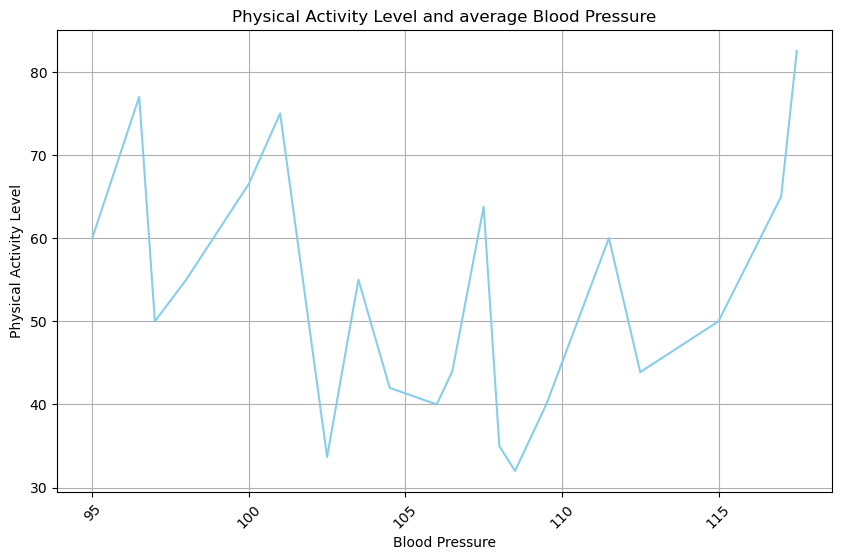

In [8]:
steps_by_bmi = df3.groupby('Average Blood Pressure')['Physical Activity Level'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(steps_by_bmi['Average Blood Pressure'], steps_by_bmi['Physical Activity Level'], color='skyblue')
plt.xlabel('Blood Pressure')
plt.ylabel('Physical Activity Level')
plt.title('Physical Activity Level and average Blood Pressure')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

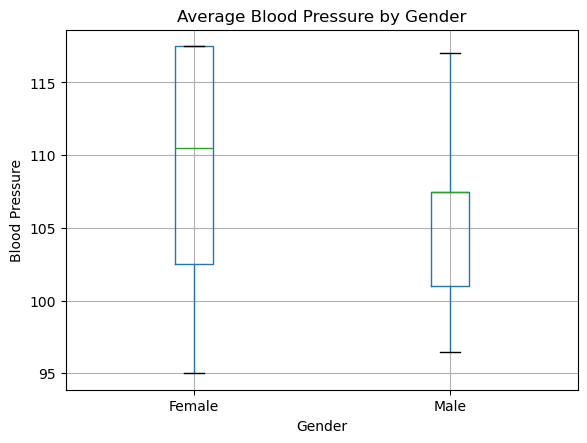

In [9]:
# Create box plot
plt.figure(figsize=(10, 6))
df3.boxplot(column='Average Blood Pressure', by='Gender')
plt.title('Average Blood Pressure by Gender')
plt.suptitle('')
plt.xlabel('Gender')
plt.ylabel('Blood Pressure')
plt.show()

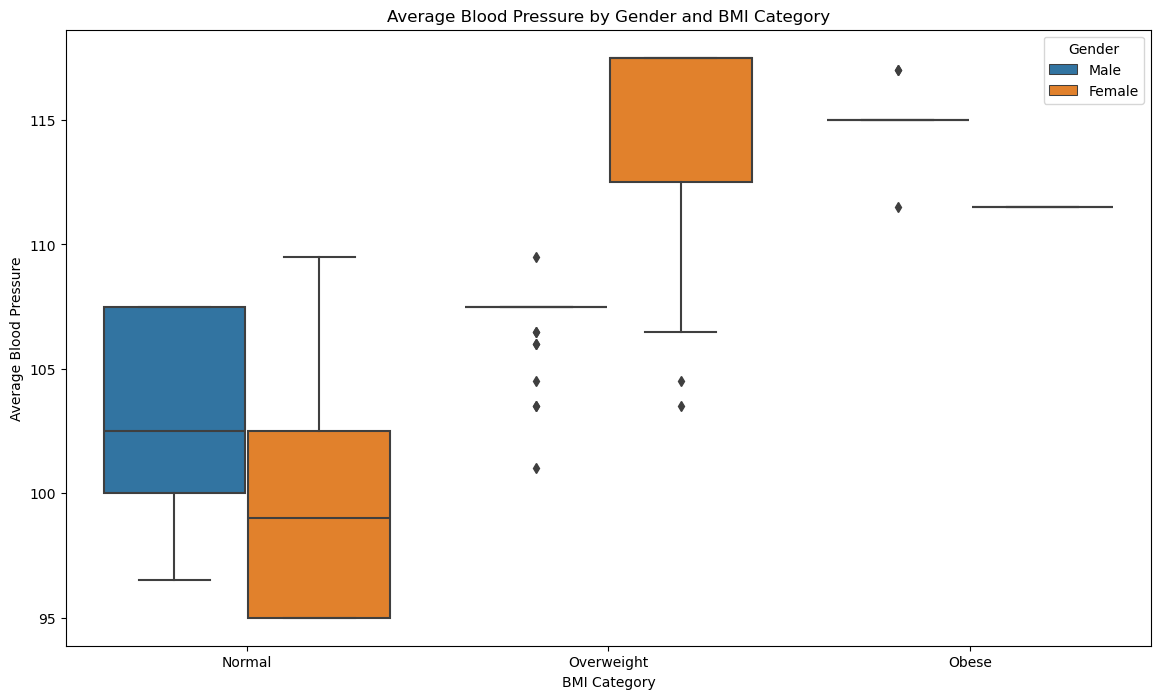

In [10]:
bmi_order = ['Normal', 'Overweight', 'Obese']

plt.figure(figsize=(14, 8))
ax = sns.boxplot(x='BMI Category', y='Average Blood Pressure', hue='Gender', data=df3, order=bmi_order)
ax.set_title('Average Blood Pressure by Gender and BMI Category')
ax.set_xlabel('BMI Category')
ax.set_ylabel('Average Blood Pressure')
plt.legend(title='Gender', loc='upper right')
plt.show()

## Observaties

Er bestaat een correlatie tussen obese zijn en een hogere bloeddruk. De Mediaan gaat duidelijk omhoog met elke BMI categorie. De boxpolts zijn wat onduidelijk in de hogere categorïen.  Volgens deze statistieken hebben vrouwen over het algemeen een lagere bloeddruk.

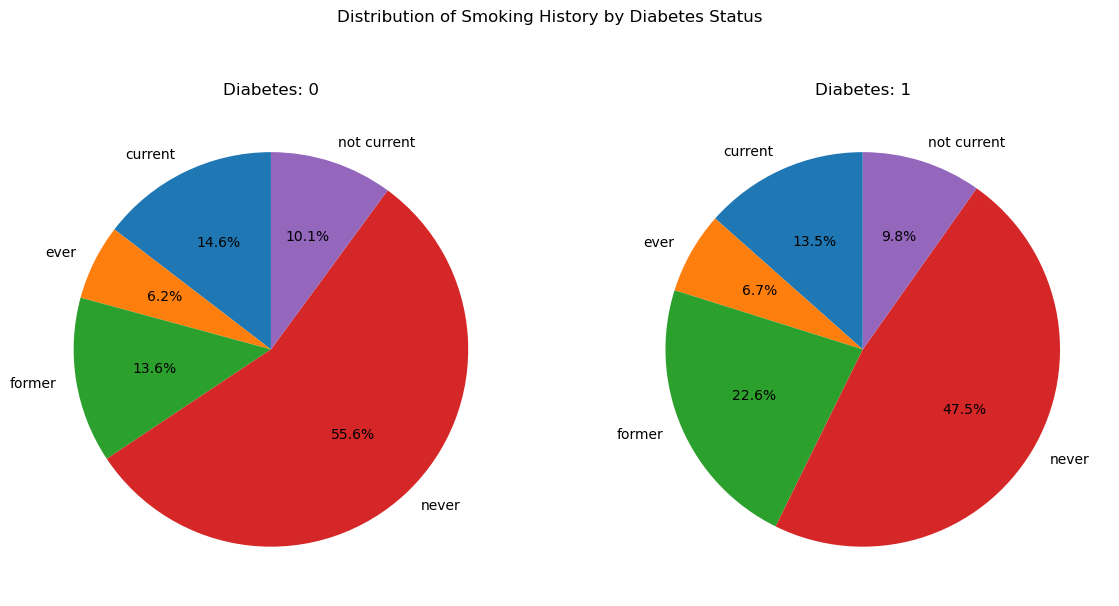

In [11]:
df2 = df2[df2['smoking_history'] != 'No Info']
diabetes_smoking_summary = df2.groupby(['diabetes', 'smoking_history']).size().unstack()

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

for i, diabetes_category in enumerate(diabetes_smoking_summary.index):
    axes[i].pie(diabetes_smoking_summary.loc[diabetes_category],
                labels=diabetes_smoking_summary.columns,
                autopct='%1.1f%%',
                startangle=90)
    axes[i].set_title(f'Diabetes: {diabetes_category}')

plt.suptitle('Distribution of Smoking History by Diabetes Status')
plt.show()

## Observaties

Deze gegevens zijn gefilterd zodat de gegevens waarvan we hun niet in het cirkeldiagram zijn geplaatst, wat tot een verkeerde visualisatie van de gegevens kan leiden.

Mensen met diabetes hebben vaker gerookt. We hebben echter nog niet ontdekt waarom dit het geval is.

### Glucose Waarden

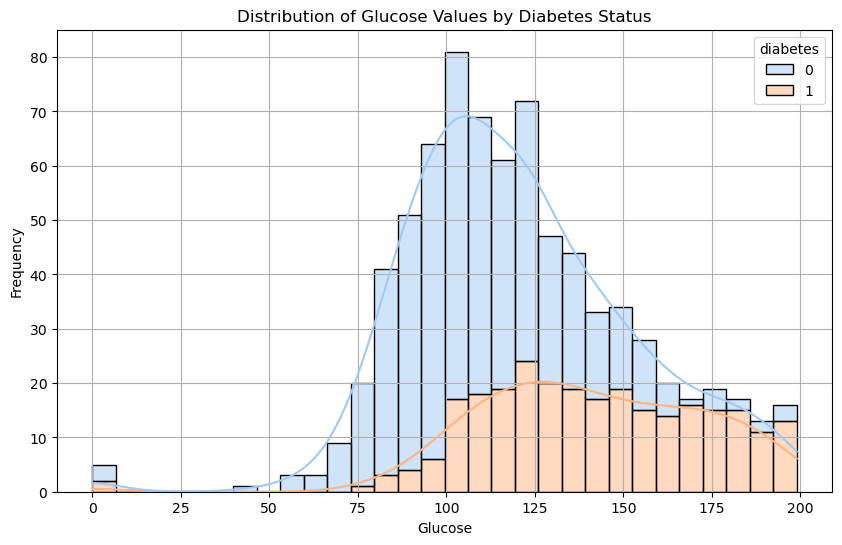

In [12]:
import warnings

warnings.filterwarnings('ignore')

df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.dropna(subset=['Glucose', 'diabetes'], inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Glucose', hue='diabetes', bins=30, kde=True, palette='pastel', multiple='stack')
plt.title('Distribution of Glucose Values by Diabetes Status')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Obervaties

It is clear that the higher the glucose level the higher the percentage of those people have diabetes. Which is to be expected since they have a strong correlation.
Er bestaat een correlatie tussen een hogere glucose waarde en diabetes, hoe hoger het glucose niveau is hoe groter het deel is dat diabetes heeft.

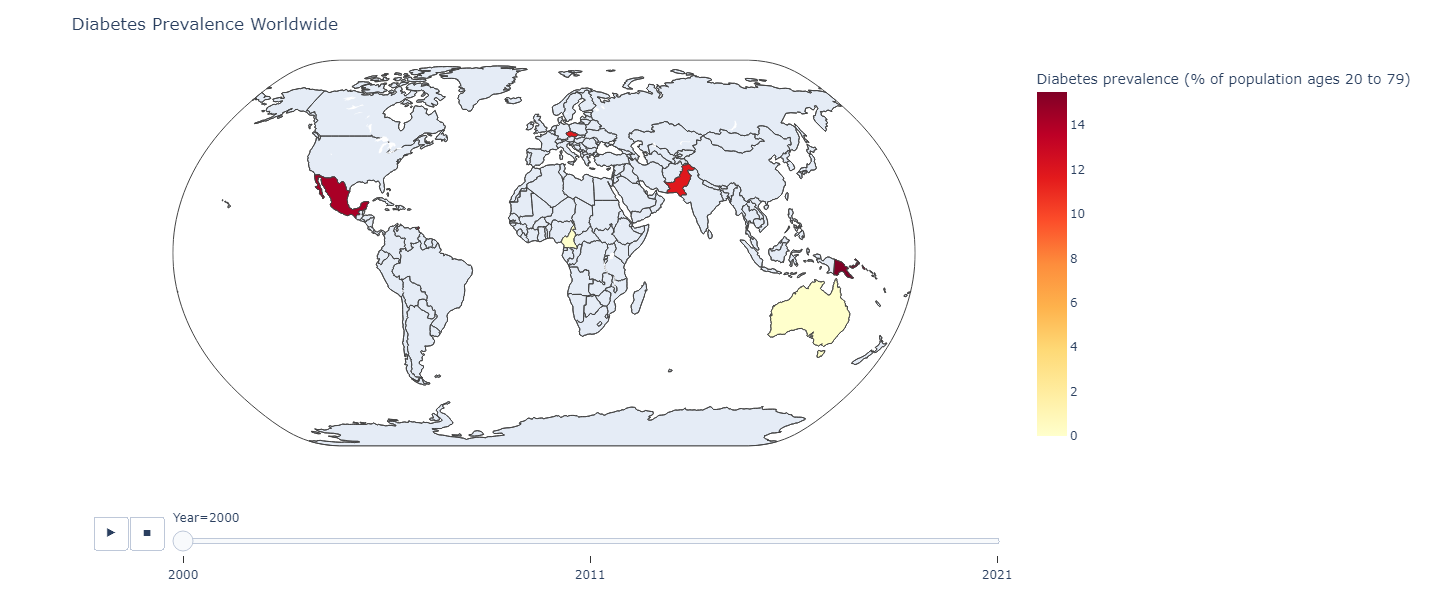

In [13]:
import plotly.express as px
import pandas as pd

diab_prev = pd.read_csv('diabetes-prevalence.csv')

diab_prev['Year'] = pd.to_numeric(diab_prev['Year'])

diab_prev_sorted = diab_prev.sort_values(by='Year')

fig = px.choropleth(diab_prev_sorted, 
                    locations='Code',
                    color='Diabetes prevalence (% of population ages 20 to 79)',  # Column with data to plot
                    hover_name='Entity',
                    animation_frame='Year',
                    color_continuous_scale='YlOrRd',
                    projection='natural earth'
                   )

fig.update_layout(title='Diabetes Prevalence Worldwide',
                  geo=dict(showcoastlines=True,
                           showcountries=True),
                  height=600,
                  width=1000
                 )

fig.show()

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


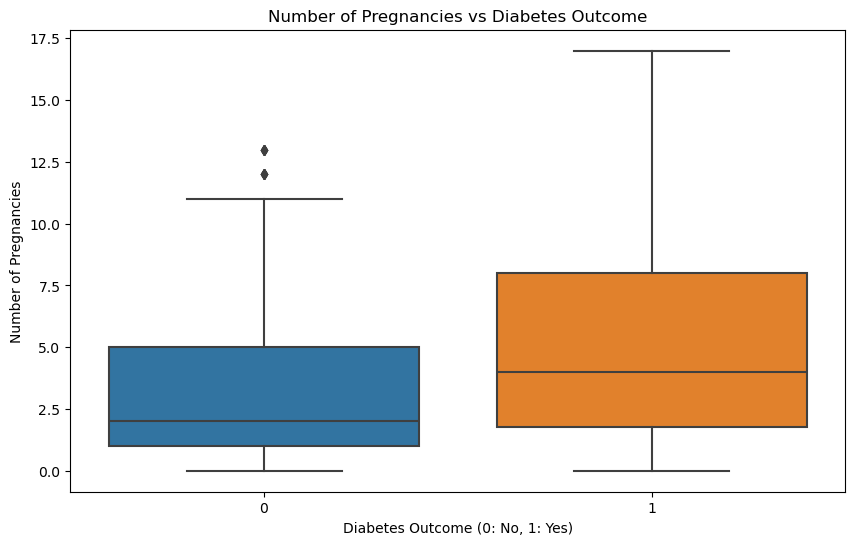

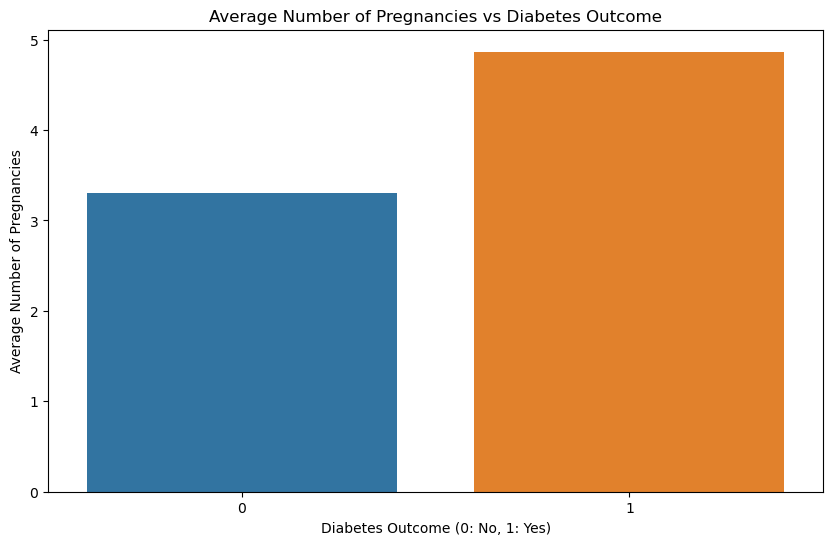

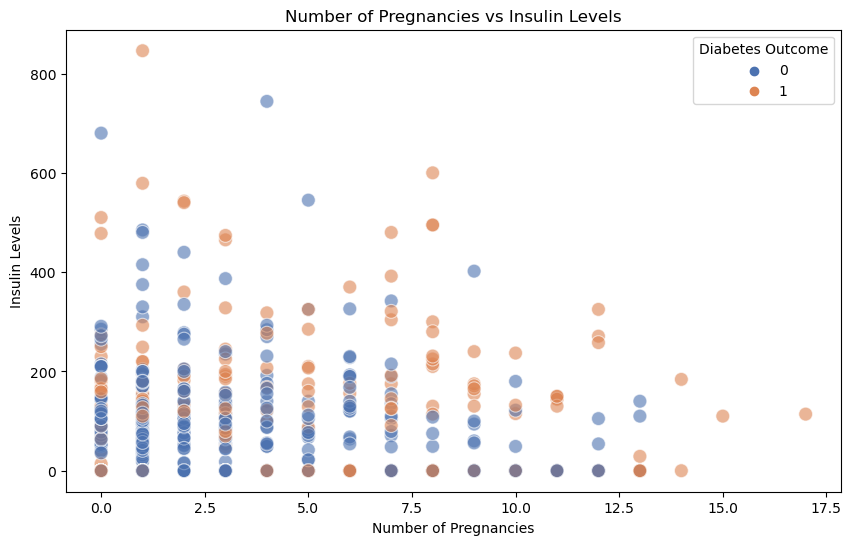

In [14]:
url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataframe
print(df.head())

# Create a correlation plot between number of pregnancies and diabetes outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Pregnancies', data=df)
plt.title('Number of Pregnancies vs Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0: No, 1: Yes)')
plt.ylabel('Number of Pregnancies')
plt.show()

# Create a bar plot to show average number of pregnancies for each outcome
avg_pregnancies = df.groupby('Outcome')['Pregnancies'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Outcome', y='Pregnancies', data=avg_pregnancies)
plt.title('Average Number of Pregnancies vs Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0: No, 1: Yes)')
plt.ylabel('Average Number of Pregnancies')
plt.show()

# Create a scatter plot for number of pregnancies vs insulin levels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pregnancies', y='Insulin', data=df, hue='Outcome', palette='deep', alpha=0.6, s=100)
plt.title('Number of Pregnancies vs Insulin Levels')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Insulin Levels')
plt.legend(title='Diabetes Outcome')
plt.show()


### Visualisatie 1: Boxplot - Aantal Zwangerschappen vs Diabetes Uitkomst
- **Zwangerschapsdiabetes**:
  - **Uitleg**: Zwangerschapsdiabetes ontstaat wanneer de hormonen van de zwangerschap de insulinewerking van het lichaam verstoren, wat leidt tot een verhoogde bloedsuikerspiegel.
  - **Impact**: Hoewel deze vorm van diabetes meestal verdwijnt na de bevalling, kan het complicaties veroorzaken voor zowel de moeder als het kind.
  - **Langetermijnrisico**: Vrouwen die zwangerschapsdiabetes hebben gehad, hebben een verhoogd risico op het ontwikkelen van type 2 diabetes later in hun leven.
  - **Relevantie voor de Boxplot**: De boxplot toont een hoger aantal zwangerschappen bij vrouwen met diabetes. Dit suggereert dat meerdere zwangerschappen mogelijk bijdragen aan een verhoogd risico op diabetes, wat kan worden verklaard door het optreden van zwangerschapsdiabetes en de latere impact ervan.

### Visualisatie 2: Staafdiagram - Gemiddeld Aantal Zwangerschappen vs Diabetes Uitkomst
- **Gemiddelde Vergelijking**:
  - **Uitleg**: Het staafdiagram laat zien dat vrouwen met diabetes gemiddeld meer zwangerschappen hebben dan vrouwen zonder diabetes.
  - **Mogelijke Verklaring**: Herhaalde zwangerschappen kunnen leiden tot meerdere episoden van zwangerschapsdiabetes, wat op zijn beurt kan bijdragen aan het ontstaan van blijvende diabetesproblemen.

### Visualisatie 3: Scatterplot - Aantal Zwangerschappen vs Insulineniveaus
- **Insulineniveaus en Zwangerschappen**:
  - **Uitleg**: De scatterplot toont de relatie tussen het aantal zwangerschappen en insulineniveaus.
  - **Relatie met Zwangerschapsdiabetes**: Tijdens de zwangerschap kunnen verhoogde insulineniveaus nodig zijn om de verhoogde bloedsuikerspiegel te beheersen, wat kan leiden tot insulineresistentie.
  - **Langetermijneffecten**: Dit verhoogde insulinegebruik kan na meerdere zwangerschappen bijdragen aan een verstoorde insulinehuishouding, wat zichtbaar kan zijn bij vrouwen met een hoger aantal zwangerschappen en diabetes.
  - **Inzichten Uit de Scatterplot**: De visualisatie maakt het mogelijk om trends en correlaties te zien tussen het aantal zwangerschappen en insulineniveaus, en hoe deze verband houden met diabetesuitkomsten.

Door deze argumenten en perspectieven te koppelen aan de respectieve visualisaties, ontstaat een duidelijker beeld van hoe zwangerschappen invloed kunnen hebben op de ontwikkeling van diabetes en de bijbehorende risico's.


In [32]:
df4 = pd.read_csv("weight_20_USA.csv")
df5 = pd.read_csv("Weight_children_USA.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df4


INDICATOR  \
0     Normal weight, overweight, and obesity among a...   
1     Normal weight, overweight, and obesity among a...   
2     Normal weight, overweight, and obesity among a...   
3     Normal weight, overweight, and obesity among a...   
4     Normal weight, overweight, and obesity among a...   
5     Normal weight, overweight, and obesity among a...   
6     Normal weight, overweight, and obesity among a...   
7     Normal weight, overweight, and obesity among a...   
8     Normal weight, overweight, and obesity among a...   
9     Normal weight, overweight, and obesity among a...   
10    Normal weight, overweight, and obesity among a...   
11    Normal weight, overweight, and obesity among a...   
12    Normal weight, overweight, and obesity among a...   
13    Normal weight, overweight, and obesity among a...   
14    Normal weight, overweight, and obesity among a...   
15    Normal weight, overweight, and obesity among a...   
16    Normal weight, overweight, and obesity among a...   
17    Normal weight, overweight, and obesity among a...   
18    Normal weight, overweight, and obesity among a...   
19    Normal weight, overweight, and obesity among a...   
20    Normal weight, overweight, and obesity among a...   
21    Normal weight, overweight, and obesity among a...   
22    Normal weight, overweight, and obesity among a...   
23    Normal weight, overweight, and obesity among a...   
24    Normal weight, overweight, and obesity among a...   
25    Normal weight, overweight, and obesity among a...   
26    Normal weight, overweight, and obesity among a...   
27    Normal weight, overweight, and obesity among a...   
28    Normal weight, overweight, and obesity among a...   
29    Normal weight, overweight, and obesity among a...   
30    Normal weight, overweight, and obesity among a...   
31    Normal weight, overweight, and obesity among a...   
32    Normal weight, overweight, and obesity among a...   
33    Normal weight, overweight, and obesity among a...   
34    Normal weight, overweight, and obesity among a...   
35    Normal weight, overweight, and obesity among a...   
36    Normal weight, overweight, and obesity among a...   
37    Normal weight, overweight, and obesity among a...   
38    Normal weight, overweight, and obesity among a...   
39    Normal weight, overweight, and obesity among a...   
40    Normal weight, overweight, and obesity among a...   
41    Normal weight, overweight, and obesity among a...   
42    Normal weight, overweight, and obesity among a...   
43    Normal weight, overweight, and obesity among a...   
44    Normal weight, overweight, and obesity among a...   
45    Normal weight, overweight, and obesity among a...   
46    Normal weight, overweight, and obesity among a...   
47    Normal weight, overweight, and obesity among a...   
48    Normal weight, overweight, and obesity among a...   
49    Normal weight, overweight, and obesity among a...   
50    Normal weight, overweight, and obesity among a...   
51    Normal weight, overweight, and obesity among a...   
52    Normal weight, overweight, and obesity among a...   
53    Normal weight, overweight, and obesity among a...   
54    Normal weight, overweight, and obesity among a...   
55    Normal weight, overweight, and obesity among a...   
56    Normal weight, overweight, and obesity among a...   
57    Normal weight, overweight, and obesity among a...   
58    Normal weight, overweight, and obesity among a...   
59    Normal weight, overweight, and obesity among a...   
60    Normal weight, overweight, and obesity among a...   
61    Normal weight, overweight, and obesity among a...   
62    Normal weight, overweight, and obesity among a...   
63    Normal weight, overweight, and obesity among a...   
64    Normal weight, overweight, and obesity among a...   
65    Normal weight, overweight, and obesity among a...   
66    Normal weight, overweight, and obesity among a...   
67    Normal weight, overweight, a

In [16]:
df5

INDICATOR        PANEL  \
0    Obesity among children and adolescents aged 2-...   2-19 years   
1    Obesity among children and adolescents aged 2-...   2-19 years   
2    Obesity among children and adolescents aged 2-...   2-19 years   
3    Obesity among children and adolescents aged 2-...   2-19 years   
4    Obesity among children and adolescents aged 2-...   2-19 years   
..                                                 ...          ...   
835  Obesity among children and adolescents aged 2-...  12-19 years   
836  Obesity among children and adolescents aged 2-...  12-19 years   
837  Obesity among children and adolescents aged 2-...  12-19 years   
838  Obesity among children and adolescents aged 2-...  12-19 years   
839  Obesity among children and adolescents aged 2-...  12-19 years   

     PANEL_NUM                          UNIT  UNIT_NUM  \
0            1  Percent of population, crude         1   
1            1  Percent of population, crude         1   
2            1  Percent of population, crude         1   
3            1  Percent of population, crude         1   
4            1  Percent of population, crude         1   
..         ...                           ...       ...   
835          4  Percent of population, crude         1   
836          4  Percent of population, crude         1   
837          4  Percent of population, crude         1   
838          4  Percent of population, crude         1   
839          4  Percent of population, crude         1   

                    STUB_NAME  STUB_NAME_NUM  STUB_LABEL_NUM    STUB_LABEL  \
0                       Total              0             0.0    2-19 years   
1                       Total              0             0.0    2-19 years   
2                       Total              0             0.0    2-19 years   
3                       Total              0             0.0    2-19 years   
4                       Total              0             0.0    2-19 years   
..                        ...            ...             ...           ...   
835  Percent of poverty level              5             5.4  400% or more   
836  Percent of poverty level              5             5.4  400% or more   
837  Percent of poverty level              5             5.4  400% or more   
838  Percent of poverty level              5             5.4  400% or more   
839  Percent of poverty level              5             5.4  400% or more   

          YEAR  YEAR_NUM          AGE  AGE_NUM  ESTIMATE   SE FLAG  
0    1988-1994         1   2-19 years      0.0      10.0  0.5  NaN  
1    1999-2002         2   2-19 years      0.0      14.8  0.7  NaN  
2    2001-2004         3   2-19 years      0.0      16.3  0.8  NaN  
3    2003-2006         4   2-19 years      0.0      16.3  0.9  NaN  
4    2005-2008         5   2-19 years      0.0      16.2  0.9  NaN  
..         ...       ...          ...      ...       ...  ...  ...  
835  2007-2010         6  12-19 years      0.3      14.0  1.8  NaN  
836  2009-2012         7  12-19 years      0.3      13.8  2.4  NaN  
837  2011-2014         8  12-19 years      0.3      13.7  3.0    *  
838  2013-2016         9  12-19 years      0.3      13.7  2.4  NaN  
839  2015-2018        10  12-19 years      0.3      11.0  1.5  NaN  

[840 rows x 16 columns]

In [27]:
def print_column_headers(dataset):
    """
    Prints all the column headers of a pandas DataFrame.
    
    Parameters:
    dataset (pd.DataFrame): The dataset from which to print column headers.
    """
    if not isinstance(dataset, pd.DataFrame):
        raise TypeError("The input dataset must be a pandas DataFrame.")
    
    print("Column Headers:")
    for col in dataset.columns:
        print(col)
print_column_headers(df4)

Column Headers:
INDICATOR
PANEL
PANEL_NUM
UNIT
UNIT_NUM
STUB_NAME
STUB_NAME_NUM
STUB_LABEL
STUB_LABEL_NUM
YEAR
YEAR_NUM
AGE
AGE_NUM
ESTIMATE
SE
FLAG


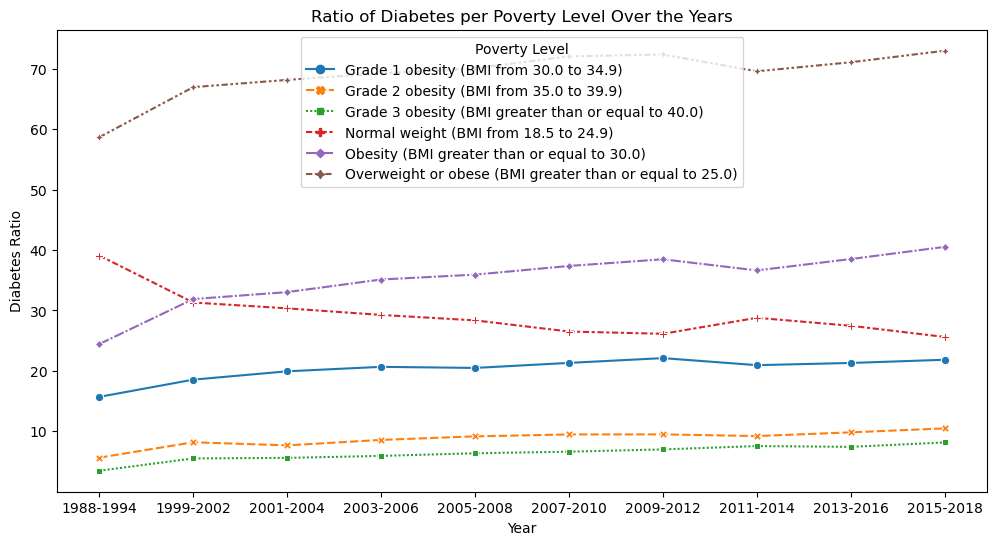

In [18]:

required_columns = ['YEAR', 'PANEL', 'ESTIMATE']
for col in required_columns:
    if col not in df4.columns:
        raise ValueError(f"Missing required column: {col}")

# Group by YEAR and PANEL (poverty level), and calculate the mean estimate (assuming ESTIMATE is the diabetes ratio)
diabetes_ratio = df4.groupby(['YEAR', 'PANEL'])['ESTIMATE'].mean().reset_index()

# Pivot the DataFrame to have years as rows and poverty levels as columns for easier plotting
pivot_table = diabetes_ratio.pivot(index='YEAR', columns='PANEL', values='ESTIMATE')

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_table, markers=True)
plt.title('Ratio of Diabetes per Poverty Level Over the Years')
plt.xlabel('Year')
plt.ylabel('Diabetes Ratio')
plt.legend(title='Poverty Level')
plt.show()

In [19]:
filtered_dataset = df4[df4['STUB_NAME'] == 'Total']


In [20]:
filtered_dataset = df5[df5['STUB_NAME'].isin(['Percent of poverty level'])]


In [21]:
filtered_recent = df5[df5['YEAR_NUM'] == 10] 


In [22]:
filtered_recent_genders = filtered_recent[
    (filtered_recent['STUB_LABEL'].isin(['Male', 'Female'])) | 
    (filtered_recent['STUB_NAME'] == 'Percent of poverty level')]


In [23]:
selected_col = ['INDICATOR', 'AGE', 'STUB_LABEL', 'ESTIMATE']
filtered_df = filtered_recent_genders[selected_col]


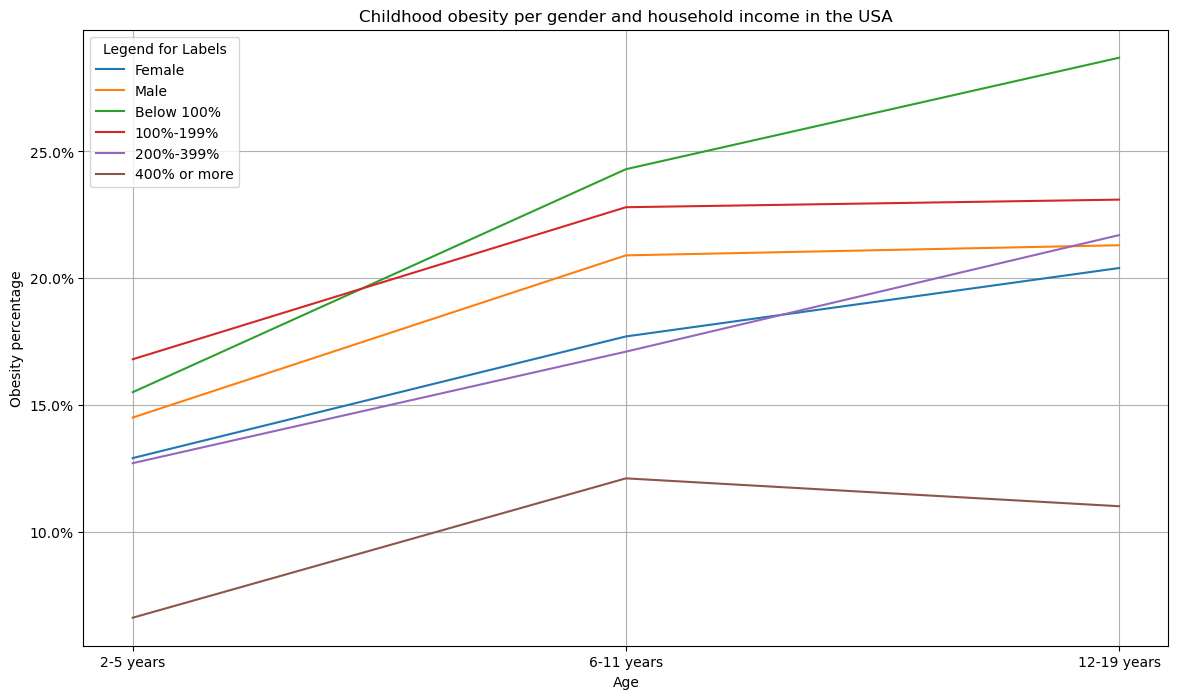

In [31]:
from matplotlib.ticker import PercentFormatter
filtered_df_2 = filtered_df[filtered_df['AGE'] != '2-19 years']

plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_df_2, x='AGE', y='ESTIMATE', hue='STUB_LABEL', markers=True, dashes=False)

plt.title('Childhood obesity per gender and household income in the USA')
plt.xlabel('Age')
plt.ylabel('Obesity percentage')
plt.legend(title='Legend for Labels')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.show()


## References

